In [15]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import pystan as ps
import pymc3 as pm
#import theano.tensor as tt
%matplotlib inline

In [177]:
wheel = ['00','27','10','25','29','12','8','19','31','18','6','21','33',
         '16','4','23','35','14','2','0','28','9','26','30','11','7','20',
         '32','17','5','22','34','15','3','24','36','13','1']
redblack = ['green', 
            'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 
            'black', 'red', 'black','red', 'black', 'red', 'black', 'red', 'black', 
            'green', 
            'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 
            'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red']
evenodd = ['none', 
           'odd', 'even', 'odd', 'odd', 'even', 'even', 'odd', 'odd', 'even', 
           'even', 'odd', 'odd', 'even', 'even', 'odd', 'odd', 'even', 'even', 
           'none', 
           'even', 'odd', 'even', 'even', 'odd', 'odd', 'even', 'even', 'odd', 
           'odd', 'even', 'even', 'odd', 'odd', 'even', 'even', 'odd', 'odd']
lowhigh = ['none',
          'high','low','high','high','low','low','high','high','low',
           'low','high','high','low','low','high','high','low','low',
          'none',
          'high','low','high','high','low','low','high','high','low',
           'low','high','high','low','low','high','high','low','low']
dozens = ['none',
         3,1,3,3,1,1,2,3,2,1,2,3,2,1,2,3,2,1,
         'none',
         3,1,3,3,1,1,2,3,2,1,2,3,2,1,2,3,2,1]
columns = ['none',
          3,1,1,2,3,2,1,1,3,3,3,3,1,1,2,2,2,2,
          'none',
          1,3,2,3,2,1,2,2,2,2,1,1,3,3,3,3,1,1]
sixline = ['none',
          ('8','9'),('3','4'),('8','9'),('9','10'),('3','4'),('2','3'),('6','7'),('10','11'),('5','6'),
          ('1','2'),('6','7'),('10','11'),('5','6'),('1','2'),('7','8'),['11'],('4','5'),['1'],
          'none',
          ('9','10'),('2','3'),('8','9'),('9','10'),('3','4'),('2','3'),('6','7'),('10','11'),('5','6'),
          ('1','2'),('7','8'),['11'],('4','5'),['1'],('7','8'),['11'],('4','5'),['1']]
square = ['none',
         ('16','18'),('5','7'),('15','17'),('17','18','19','20'),('6','8'),('3','4','5','6'),('11','13'),('19','21'),('10','12'),
         ('2','4'),('12','14'),('20','22'),('9','11'),('1','3'),('13','14','15','16'),('21','22'),('7','8','9','10'),('1','2'),
         'none',
         ('17','19'),('4','6'),('15','16','17','18'),('18','20'),('5','6','7','8'),('3','5'),('11','12','13','14'),('19','20','21','22'),('9','10','11','12'),
         ('1','2','3','4'),('13','15'),['21'],('8','10'),['2'],('14','16'),['22'],('7','9'),['1']]
street = ['none',
         '9','4','9','10','4','3','7','11','6','2','7','11','6','2','8','12','5','1',
         'none',
         '10','3','9','10','4','3','7','11','6','2','8','12','5','1','8','12','5','1']
split = ['none',
        ('40','42','45'),('13','16','18'),('38','41','43'),('44','46','47','49'),('15','17','20'),('9','11','12','14'),('28','31','33'),('48','51','53'),('25','27','30'),
        ('5','7','10'),('30','32','35'),('50','52','55'),('23','26','28'),('3','6','8'),('34','36','37','39'),('54','56','57'),('19','21','22','24'),('1','2','4'),
        'none',
        ('43','46','48'),('10','12','15'),('39','41','42','44'),('45','47','50'),('14','16','17','19'),('8','11','13'),('29','31','32','34'),('49','51','52','54'),('24','26','27','29'),
        ('4','6','7','9'),('33','36','38'),('53','56'),('20','22','25'),('2','5'),('35','37','40'),('55','57'),('18','21','23'),('1','3')]

neighbor = []
wheel2 = ['24','36','13','1','00','27','10','25','29','12','8','19','31','18','6','21','33',
         '16','4','23','35','14','2','0','28','9','26','30','11','7','20',
         '32','17','5','22','34','15','3','24','36','13','1','00','27','10','25']
for i in range(len(wheel)):
    n = wheel[i]
    bet = wheel2[((i+4)-4):((i+4)+5)]
    neighbor.append(bet)

In [121]:
spins = np.array([])
for i in range(1000):
    spins = np.append(spins, np.array([rnd.choice(wheel)]))

In [122]:
print(len(spins))
#print(spins)

1000


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


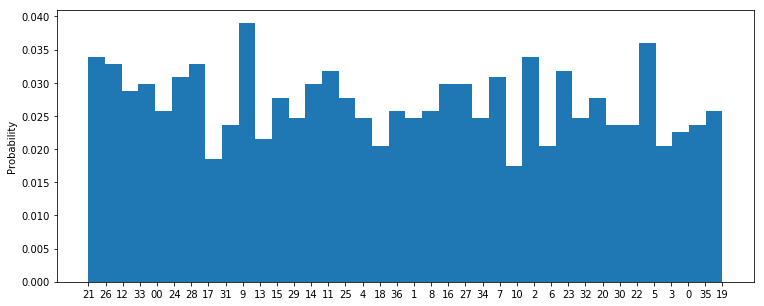

In [123]:
figsize(12.5, 5)
plt.hist(spins, normed=True, bins=38)
plt.ylabel('Probability');

In [124]:
spins_count = {x : 0 for x in wheel}

In [125]:
for i in spins:
    spins_count[i] += 1

In [126]:
counts = np.array(list(spins_count.values()))

In [127]:
model = """
data {
  int<lower=1> m;
  int counts[m];
  vector<lower=0>[m] priors;
}

parameters {
  simplex[m] p;
}

model {
  p ~ dirichlet(priors);
  counts ~ multinomial(p);
}
"""

In [128]:
stanmodel = ps.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_64c300d688746d4e6c6f00d3cc2d73d6 NOW.


In [129]:
data = {'m':38, 'counts':counts, 'priors':np.ones(38)}

In [130]:
fit = stanmodel.sampling(data=data)

In [131]:
#fit.plot()
fit_par = fit.extract(permuted=True)

In [132]:
fit_par['p'].shape

(4000, 38)

In [133]:
fit_samples = fit_par['p']

In [134]:
fit_samples[3999]

array([0.0170085 , 0.01431187, 0.01388944, 0.02194686, 0.02924051,
       0.03161933, 0.02656897, 0.02460506, 0.02223119, 0.01431727,
       0.01195114, 0.04213077, 0.029666  , 0.0284425 , 0.02680293,
       0.02251479, 0.02414467, 0.03806231, 0.03767767, 0.02061474,
       0.02704915, 0.04779276, 0.03168844, 0.02618398, 0.03938668,
       0.03634921, 0.03524459, 0.03548756, 0.01977369, 0.03375201,
       0.02004414, 0.01700938, 0.01992194, 0.01680812, 0.0278716 ,
       0.02126338, 0.02602461, 0.02060227])

In [137]:
def getRedBlackProb(p):
    redblack_dic = {'red':0, 'black':0, 'green':0}
    zipped_array = zip(wheel,p,redblack)
    for i in zipped_array:
        if i[2] == 'green':
            redblack_dic['green'] += i[1]
        elif i[2] == 'red':
            redblack_dic['red'] += i[1]
        else:
            redblack_dic['black'] += i[1]
            
    return redblack_dic

In [151]:
list(getRedBlackProb(np.ones(38)/38).values())

[0.4736842105263156, 0.4736842105263156, 0.05263157894736842]

In [139]:
def getEvenOddProb(p):
    evenodd_dic = {'even':0, 'odd':0, 'none':0}
    zipped_array = zip(wheel,p,evenodd)
    for i in zipped_array:
        if i[2] == 'even':
            evenodd_dic['even'] += i[1]
        elif i[2] == 'odd':
            evenodd_dic['odd'] += i[1]
        else:
            evenodd_dic['none'] += i[1]
            
    return evenodd_dic

In [150]:
list(getEvenOddProb(np.ones(38)/38).values())

[0.4736842105263156, 0.4736842105263156, 0.05263157894736842]

In [141]:
def getLowHighProb(p):
    lowhigh_dic = {'low':0, 'high':0, 'none':0}
    zipped_array = zip(wheel,p,lowhigh)
    for i in zipped_array:
        if i[2] == 'low':
            lowhigh_dic['low'] += i[1]
        elif i[2] == 'high':
            lowhigh_dic['high'] += i[1]
        else:
            lowhigh_dic['none'] += i[1]
            
    return lowhigh_dic

In [152]:
list(getLowHighProb(np.ones(38)/38).values())

[0.4736842105263156, 0.4736842105263156, 0.05263157894736842]

In [142]:
def getDozensProb(p):
    dozens_dic = {'1':0, '2':0, '3':0, 'none':0}
    zipped_array = zip(wheel,p,dozens)
    for i in zipped_array:
        if i[2] == 1:
            dozens_dic['1'] += i[1]
        elif i[2] == 2:
            dozens_dic['2'] += i[1]
        elif i[2] == 3:
            dozens_dic['3'] += i[1]
        else:
            dozens_dic['none'] += i[1]
            
    return dozens_dic

In [153]:
list(getDozensProb(np.ones(38)/38).values())

[0.3157894736842105,
 0.3157894736842105,
 0.3157894736842105,
 0.05263157894736842]

In [144]:
def getColumnsProb(p):
    columns_dic = {'1':0, '2':0, '3':0, 'none':0}
    zipped_array = zip(wheel,p,columns)
    for i in zipped_array:
        if i[2] == 1:
            columns_dic['1'] += i[1]
        elif i[2] == 2:
            columns_dic['2'] += i[1]
        elif i[2] == 3:
            columns_dic['3'] += i[1]
        else:
            columns_dic['none'] += i[1]
            
    return columns_dic

In [154]:
list(getColumnsProb(np.ones(38)/38).values())

[0.3157894736842105,
 0.3157894736842105,
 0.3157894736842105,
 0.05263157894736842]

In [167]:
def getSixlineProb(p):
    sixline_dic = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, 'none':0}
    zipped_array = zip(wheel,p,sixline)
    for i in zipped_array:
        if i[2] == 'none':
            sixline_dic['none'] += i[1]
        else:
            for j in range(len(i[2])):
                sixline_dic[i[2][j]] += i[1]
                
    return sixline_dic

In [168]:
list(getSixlineProb(np.ones(38)/38).values())

[0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.15789473684210525,
 0.05263157894736842]

In [170]:
def getSquareProb(p):
    square_dic = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, 
                  '12':0, '13':0, '14':0, '15':0, '16':0, '17':0, '18':0, '19':0, '20':0, '21':0, '22':0, 'none':0}
    zipped_array = zip(wheel,p,square)
    for i in zipped_array:
        if i[2] == 'none':
            square_dic['none'] += i[1]
        else:
            for j in range(len(i[2])):
                square_dic[i[2][j]] += i[1]
                
    return square_dic

In [171]:
list(getSquareProb(np.ones(38)/38).values())

[0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.05263157894736842]

In [174]:
def getStreetProb(p):
    street_dic = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, 'none':0}
    zipped_array = zip(wheel,p,street)
    for i in zipped_array:
        if i[2] == 'none':
            street_dic['none'] += i[1]
        else:
            street_dic[i[2]] += i[1]
                
    return street_dic

In [176]:
list(getStreetProb(np.ones(38)/38).values())

[0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.05263157894736842]

In [178]:
def getSplitProb(p):
    split_dic = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, 
                  '12':0, '13':0, '14':0, '15':0, '16':0, '17':0, '18':0, '19':0, '20':0, '21':0, '22':0,
                 '23':0, '24':0, '25':0, '26':0, '27':0, '28':0, '29':0, '30':0, '31':0, '32':0, '33':0,
                 '34':0, '35':0, '36':0, '37':0, '38':0, '39':0, '40':0, '41':0, '42':0, '43':0, '44':0,
                 '45':0, '46':0, '47':0, '48':0, '49':0, '50':0, '51':0, '52':0, '53':0, '54':0, '55':0,
                 '56':0, '57':0, 'none':0}
    zipped_array = zip(wheel,p,split)
    for i in zipped_array:
        if i[2] == 'none':
            split_dic['none'] += i[1]
        else:
            for j in range(len(i[2])):
                split_dic[i[2][j]] += i[1]
                
    return split_dic

In [179]:
list(getSplitProb(np.ones(38)/38).values())

[0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.0526315

In [180]:
def getNeighborProb(p):
    neighbor_dic = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, 
                  '12':0, '13':0, '14':0, '15':0, '16':0, '17':0, '18':0, '19':0, '20':0, '21':0, '22':0,
                 '23':0, '24':0, '25':0, '26':0, '27':0, '28':0, '29':0, '30':0, '31':0, '32':0, '33':0,
                 '34':0, '35':0, '36':0, '0':0, '00':0}
    zipped_array = zip(wheel,p,neighbor)
    for i in zipped_array:
        for j in range(len(i[2])):
                neighbor_dic[i[2][j]] += i[1]
                
    return neighbor_dic

In [181]:
list(getNeighborProb(np.ones(38)/38).values()) ???? Zaid this looks weird

[0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788]